In [1]:
import numpy as np

import numpy.random as npr


import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:
#Données

offset_Tachy = -28 

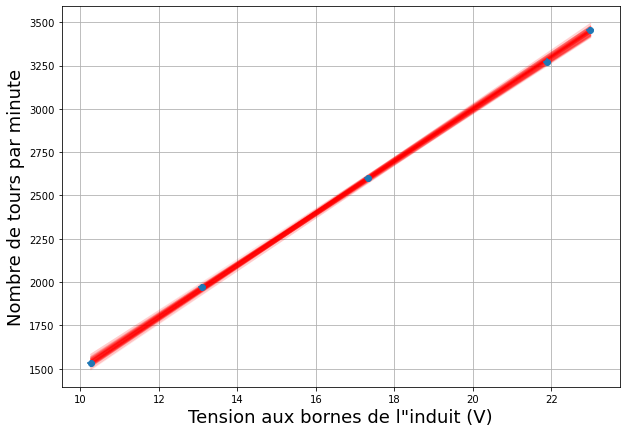

150.0166375313457 +- 2.194298829602526
-2.1611795610006026 +- 38.18351919255012


In [3]:
#Mesure à vide - vérification de la linéarité entre Tension aux bornes de l'induit et nbr de tours par min

U_induit = np.array([10.27, 13.11, 17.32, 21.9, 23.0]) #Tension délivrée par l'alimentation de l'induit (V)
dU_induit = 0.10

N_toursmin = np.array([1503, 1942, 2572, 3245, 3425]) - offset_Tachy # Nombre de tours par minute (Tours/min)
dN_toursmin = 20

#Monte-Carlo de la variation de température

def f_lin(x,a,b):
    return a*x+b

N_mc = 100 # nombre de simulations
param = np.zeros((2, N_mc))


for i in range(N_mc):
    
    N_toursmin_mc = np.array([])
    U_induit_mc = np.array([])
    
    for k in range (len(U_induit)) :
        N_toursmin_mc = np.append(N_toursmin_mc, npr.normal(loc=N_toursmin[k], scale=dN_toursmin))
        U_induit_mc = np.append(U_induit_mc, npr.normal(loc=U_induit[k], scale=dU_induit))
            
    pop, covop = curve_fit(f_lin, U_induit_mc, N_toursmin_mc)
    param[0,i] = pop[0]
    param[1,i] = pop[1]
    
plt.figure(5, figsize=(10,7))
for i in range(N_mc):
    y_th = f_lin(U_induit, *param[:,i])
    plt.plot(U_induit, y_th,'r', alpha=0.1)
plt.errorbar(U_induit, N_toursmin, xerr=dU_induit, yerr=dN_toursmin, fmt='o')
plt.grid(which='both')
plt.xlabel('Tension aux bornes de l"induit (V)', fontsize=18)
plt.ylabel('Nombre de tours par minute', fontsize=18)
plt.show()    

#Calcul de la pente

a_moy = np.mean(param[0,:])
a_sig = np.std(param[0,:])
b_moy = np.mean(param[1,:])
b_sig = np.std(param[1,:])

print (a_moy, '+-',a_sig )
print (b_moy, '+-',b_sig )
